Input semua library yang diperlukan

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sb

panggil file

In [ ]:
data = pd.read_csv('data-luas-panen-dan-produksi-sayur-dki-jakarta-tahun-2013-2017.csv')
print(data)

    tahun   jenis_tanaman  luas_panen satuan_luas  produksi satuan_produksi
0    2013           Bayam       557.0          Ha     957.0              Kw
1    2013        Kangkung      1016.0          Ha    5057.0              Kw
2    2013  Kacang Panjang         2.0          Ha       8.0              Kw
3    2013         Ketimun         9.0          Ha      23.0              Kw
4    2013          Terung         4.0          Ha      15.0              Kw
5    2013            Sawi       440.0          Ha    3068.0              Kw
6    2014           Bayam       558.0          Ha    2246.0              Kw
7    2014        Kangkung       778.0          Ha    5272.0              Kw
8    2014  Kacang Panjang         6.0          Ha       7.0              Kw
9    2014         Ketimun        37.0          Ha      16.0              Kw
10   2014          Terung         2.0          Ha       5.0              Kw
11   2014            Sawi       407.0          Ha    2916.0              Kw
12   2015   

inisiasi variabel yang akan dipakai

In [ ]:
usageData = data[["tahun", "jenis_tanaman", "luas_panen", "produksi"]]
print(usageData)

    tahun   jenis_tanaman  luas_panen  produksi
0    2013           Bayam       557.0     957.0
1    2013        Kangkung      1016.0    5057.0
2    2013  Kacang Panjang         2.0       8.0
3    2013         Ketimun         9.0      23.0
4    2013          Terung         4.0      15.0
5    2013            Sawi       440.0    3068.0
6    2014           Bayam       558.0    2246.0
7    2014        Kangkung       778.0    5272.0
8    2014  Kacang Panjang         6.0       7.0
9    2014         Ketimun        37.0      16.0
10   2014          Terung         2.0       5.0
11   2014            Sawi       407.0    2916.0
12   2015           Bayam       710.0   56999.0
13   2015        Kangkung      1062.0  102229.0
14   2015  Kacang Panjang         4.0      16.0
15   2015         Ketimun        14.0     226.0
16   2015          Terung         NaN       NaN
17   2015            Sawi       525.0   46886.0
18   2016           Bayam       696.0   48428.0
19   2016        Kangkung       913.0   

In [ ]:
for i in usageData:
  if usageData[i].isna().values.any():
    usageData[i] = usageData[i].fillna(usageData[i].mean())

print(usageData)

    tahun   jenis_tanaman   luas_panen   produksi
0    2013           Bayam   557.000000     957.00
1    2013        Kangkung  1016.000000    5057.00
2    2013  Kacang Panjang     2.000000       8.00
3    2013         Ketimun     9.000000      23.00
4    2013          Terung     4.000000      15.00
5    2013            Sawi   440.000000    3068.00
6    2014           Bayam   558.000000    2246.00
7    2014        Kangkung   778.000000    5272.00
8    2014  Kacang Panjang     6.000000       7.00
9    2014         Ketimun    37.000000      16.00
10   2014          Terung     2.000000       5.00
11   2014            Sawi   407.000000    2916.00
12   2015           Bayam   710.000000   56999.00
13   2015        Kangkung  1062.000000  102229.00
14   2015  Kacang Panjang     4.000000      16.00
15   2015         Ketimun    14.000000     226.00
16   2015          Terung   351.071429   17681.25
17   2015            Sawi   525.000000   46886.00
18   2016           Bayam   696.000000   48428.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


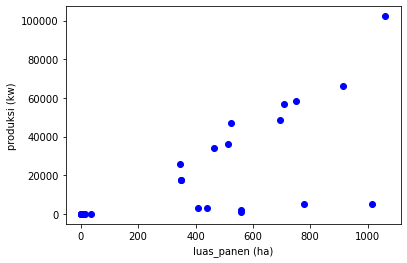

In [ ]:
plt.scatter(usageData["luas_panen"], usageData["produksi"], color="blue")
plt.xlabel("luas_panen (ha)")
plt.ylabel("produksi (kw)")
plt.show()

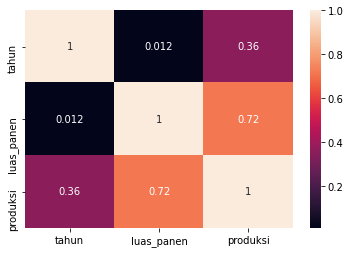

In [ ]:
corr_matrix = usageData.corr()
sb.heatmap(data=corr_matrix, annot=True)
plt.show()

In [ ]:
train, test = train_test_split(usageData, test_size = 0.5)
regression = linear_model.LinearRegression()
regression.fit(train[["luas_panen"]], train[["produksi"]])
print('Coefficients: ', regression.coef_)
print('Intercept: ', regression.intercept_)

Coefficients:  [[67.62949835]]
Intercept:  [-6595.30864393]


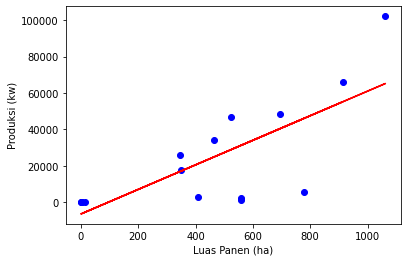

In [ ]:
plt.scatter(train["luas_panen"], train["produksi"], color = 'blue')
plt.plot(train[["luas_panen"]], regression.coef_ * train[["luas_panen"]] + regression.intercept_, '-r')
plt.xlabel("Luas Panen (ha)")
plt.ylabel("Produksi (kw)")
plt.rcParams["figure.figsize"] = [8,8]
plt.show()